<a href="https://colab.research.google.com/github/gusakv/Retail-Data-Analytics/blob/main/Retail_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
sns.set(style='whitegrid')
import plotly.express as px
plt.style.use('fast')
import warnings
warnings.filterwarnings("ignore")
import datetime

In [2]:
#plt.style.available

# Загрузка и консолидация данных

## Загрузка наборов данных

Ссылка на kaggle: https://www.kaggle.com/datasets/manjeetsingh/retaildataset

Ссылки на файлы: https://drive.google.com/file/d/1ZkcMEca9QhjTPvdFy4IDPaUMYdxSnUaM/view?usp=sharing
https://drive.google.com/file/d/19VKBVZrYXsWByyr2dxSpGHxc35pIzaJ6/view?usp=sharing
https://drive.google.com/file/d/1pG2NUR5xgRKDuYOJwEo8JN0eKcoT4x0B/view?usp=sharing

In [3]:
!gdown --id 1ZkcMEca9QhjTPvdFy4IDPaUMYdxSnUaM
!gdown --id 19VKBVZrYXsWByyr2dxSpGHxc35pIzaJ6
!gdown --id 1pG2NUR5xgRKDuYOJwEo8JN0eKcoT4x0B

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZkcMEca9QhjTPvdFy4IDPaUMYdxSnUaM
To: /content/Features data set.csv
100% 600k/600k [00:00<00:00, 25.2MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19VKBVZrYXsWByyr2dxSpGHxc35pIzaJ6
To: /content/sales data-set.csv
100% 13.3M/13.3M [00:00<00:00, 65.0MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
Fro

In [4]:
features = pd.read_csv('/content/Features data set.csv')
sales = pd.read_csv('/content/sales data-set.csv')
stores = pd.read_csv('/content/stores data-set.csv')

##Первичный обзор данных

In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [7]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


## Проверка информации о данных

In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


Наблюдения:

- В датасете features 8190 записей.
- Значительное количество пропусков в столбцах MarkDown1 - MarkDown5, CPI и Unemployment.
- Столбцы Store, Date, Temperature, Fuel_Price и IsHoliday заполнены полностью.

## Преобразование столбцов дат в формат даты

In [9]:
# Преобразование столбца Date в формат datetime
features['Date'] = pd.to_datetime(features['Date'], format='%d/%m/%Y')
sales['Date'] = pd.to_datetime(sales['Date'], format='%d/%m/%Y')

## Объединение данных

In [10]:
# Объединение sales и features
data = pd.merge(sales, features, on=['Store', 'Date', 'IsHoliday'], how='left')

In [11]:
# Добавление информации о магазинах
data = pd.merge(data, stores, on='Store', how='left')

## Проверка информации о объединенном датасете

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

Наблюдения:

- После объединения датасет содержит 421570 записей.
- Столбцы MarkDown1 - MarkDown5, CPI, Unemployment содержат пропущенные значения.
- Столбец Type является категориальным.

## Проверка и обработка пропущенных значений

In [13]:
data.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


Наблюдение:

- Данные MarkDown доступны не для всех магазинов и не на всем временном интервале.
- Отсутствие значений может означать отсутствие скидок.
- Заполним пропуски нулями.

## Заполнение пропусков

In [14]:
# Список столбцов c MarkDown
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
# Замена NaN на 0
data[markdown_cols] = data[markdown_cols].fillna(0)

Пропуски в столбцах CPI и Unemployment:

- Заполним пропущенные значения средними значениями для соответствующего Store, Year, Month.

In [15]:
# Добавление столбцов Year и Month
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [16]:
# Заполнение пропусков в CPI
data['CPI'] = data.groupby(['Store', 'Year', 'Month'])['CPI'].transform(lambda x: x.fillna(x.mean()))

In [17]:
# Заполнение пропусков в Unemployment
data['Unemployment'] = data.groupby(['Store', 'Year', 'Month'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

In [18]:
# # Заполнение оставшихся пропусков общим средним
# data['CPI'] = data['CPI'].fillna(data['CPI'].mean())
# data['Unemployment'] = data['Unemployment'].fillna(data['Unemployment'].mean())

Проверка после заполнения:

In [19]:
data.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


Пропуски устранены.

## Преобразование категориальных переменных

In [20]:
# Преобразование Type в числовой формат
type_mapping = {'A': 1, 'B': 2, 'C': 3}
data['Type'] = data['Type'].map(type_mapping)

In [21]:
# Преобразование IsHoliday в числовой формат
data['IsHoliday'] = data['IsHoliday'].astype(int)

## Создание дополнительных временных признаков

Добавим столбцы Week, Quarter.

In [22]:
# Номер недели в году
data['Week'] = data['Date'].dt.isocalendar().week

# Номер квартала
data['Quarter'] = data['Date'].dt.quarter

- Данные успешно объединены и очищены.
- Пропущенные значения обработаны.
- Категориальные переменные преобразованы для анализа.
- Добавлены дополнительные временные признаки для дальнейшего анализа.

In [23]:
# Обработка пропущенных значений в Temperature
data['Temperature'] = data['Temperature'].fillna(data['Temperature'].mean())

In [24]:
 # Создание температурных категорий
 data['Temp_Category'] = pd.cut(
   data['Temperature'],
   bins=[-10, 30, 60, 90, 120],
   labels=['Very cold', 'Cold', 'Warm', 'Hot']
 )

In [25]:
 # Добавление категории 'Unknown' и заполнение пропусков
 data['Temp_Category'] = data['Temp_Category'].cat.add_categories('Unknown')
 data['Temp_Category'] = data['Temp_Category'].fillna('Unknown')

Проверка итоговых данных

In [26]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Quarter,Temp_Category
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,1,151315,2010,2,5,1,Cold
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,...,0.0,211.242170,8.106,1,151315,2010,2,6,1,Cold
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,...,0.0,211.289143,8.106,1,151315,2010,2,7,1,Cold
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,...,0.0,211.319643,8.106,1,151315,2010,2,8,1,Cold
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,...,0.0,211.350143,8.106,1,151315,2010,3,9,1,Cold


Данные готовы для дальнейшего анализа. Все необходимые преобразования выполнены

# Исследовательский анализ данных (EDA)

## Распределение данных в столбцах

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'Dept'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Weekly_Sales'}>],
       [<Axes: title={'center': 'IsHoliday'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Fuel_Price'}>,
        <Axes: title={'center': 'MarkDown1'}>],
       [<Axes: title={'center': 'MarkDown2'}>,
        <Axes: title={'center': 'MarkDown3'}>,
        <Axes: title={'center': 'MarkDown4'}>,
        <Axes: title={'center': 'MarkDown5'}>],
       [<Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'Unemployment'}>,
        <Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Size'}>],
       [<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>, <Axes: >, <Axes: >]],
      dtype=object)

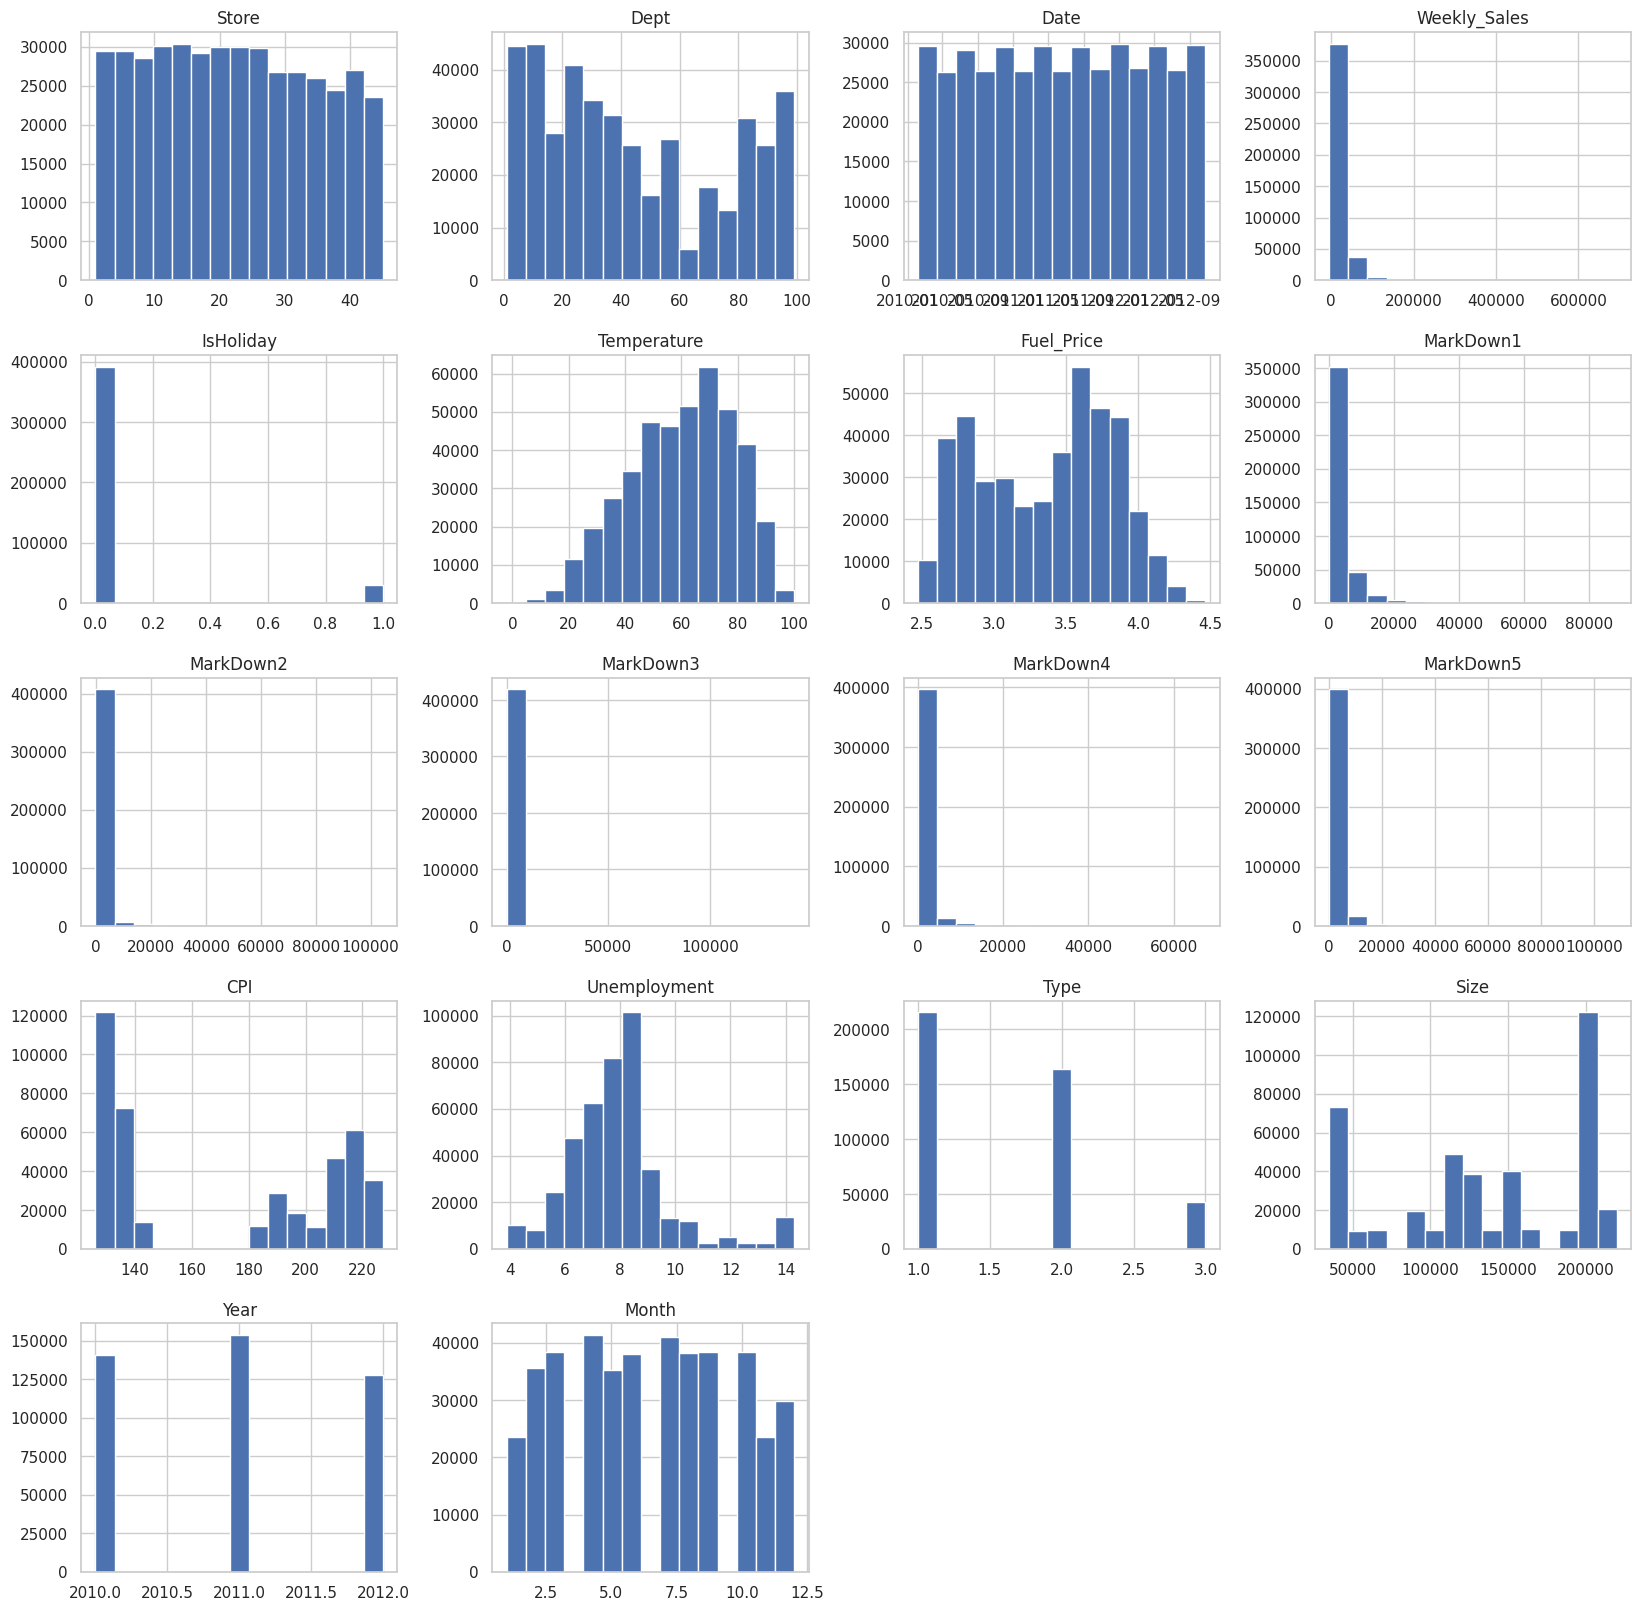

In [27]:
data.iloc[:,:18].hist(bins=15, figsize=(20, 20))

## Анализ продаж во времени

### Общий тренд продаж по времени

In [28]:
# Группировка данных по дате и суммирование продаж
sales_by_date = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

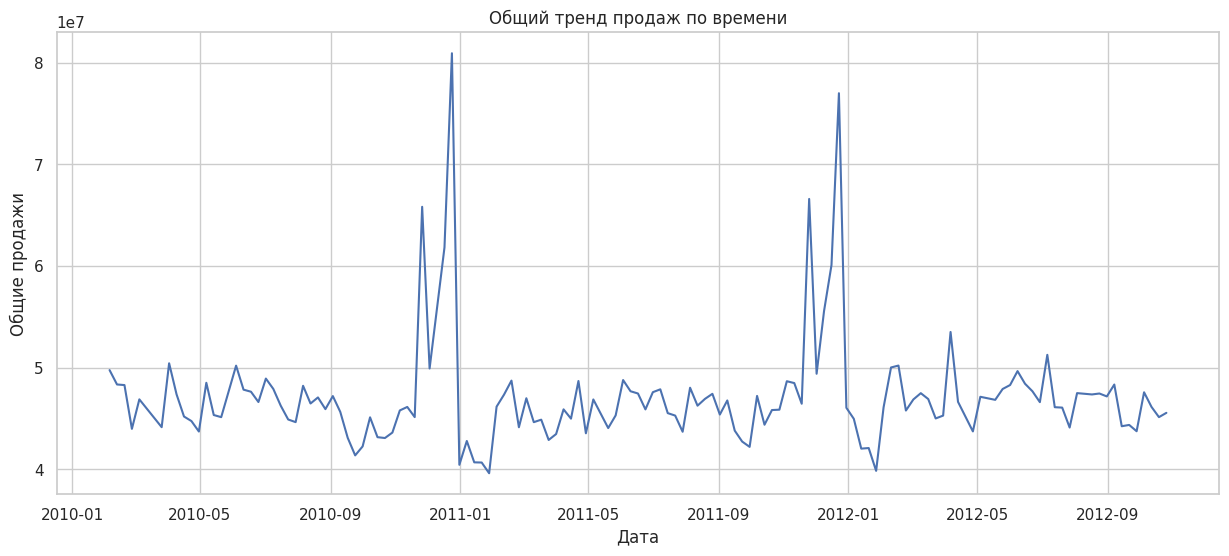

In [29]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date', y='Weekly_Sales', data=sales_by_date)
plt.title('Общий тренд продаж по времени')
plt.xlabel('Дата')
plt.ylabel('Общие продажи')
plt.show()

Наблюдение:

- Продажи демонстрируют сезонные колебания.
- Наблюдаются пики продаж в определенные периоды, вероятно связанные с праздниками.
- В конце года продажи достигают максимума.
- Есть общая тенденция к увеличению продаж в праздничные сезоны.

### Анализ продаж по годам

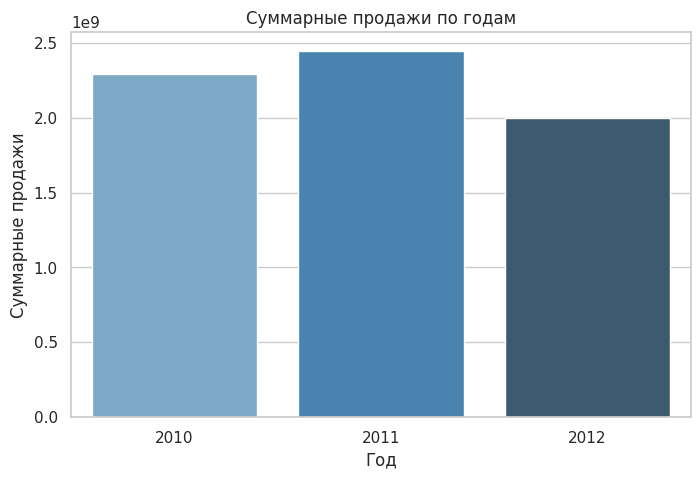

In [30]:
yearly_sales = data.groupby('Year')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Year', y='Weekly_Sales', data=yearly_sales, palette='Blues_d')
plt.title('Суммарные продажи по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.show()


### Анализ продаж по месяцам

In [31]:
# Сумма продаж по месяцам
sales_by_month = data.groupby('Month')['Weekly_Sales'].sum().reset_index()

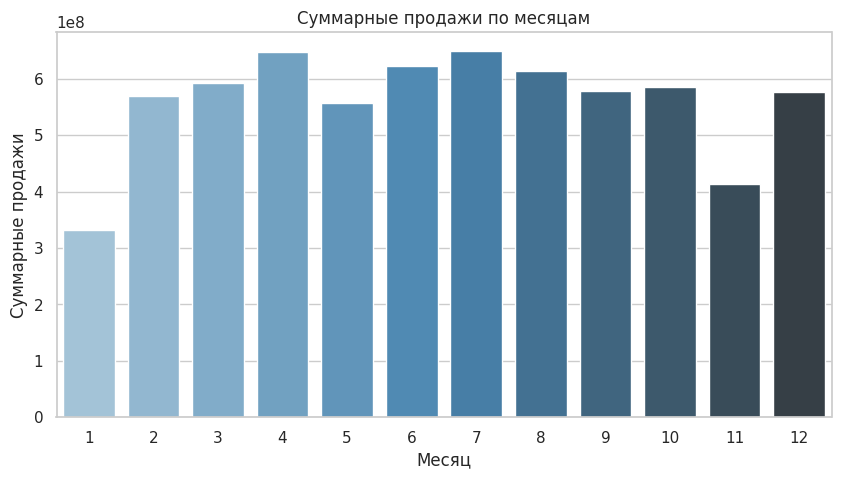

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='Weekly_Sales', data=sales_by_month, palette='Blues_d')
plt.title('Суммарные продажи по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Суммарные продажи')
plt.show()

Наблюдения:

Максимальные продажи наблюдаются в апреле (4-й месяц) и июле (7-й месяц).

Минимальные продажи приходятся на январь (1-й месяц) и ноябрь (11-й месяц).


### Анализ влияния праздников

In [33]:
# Средние продажи в праздничные и обычные недели
sales_by_holiday = data.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

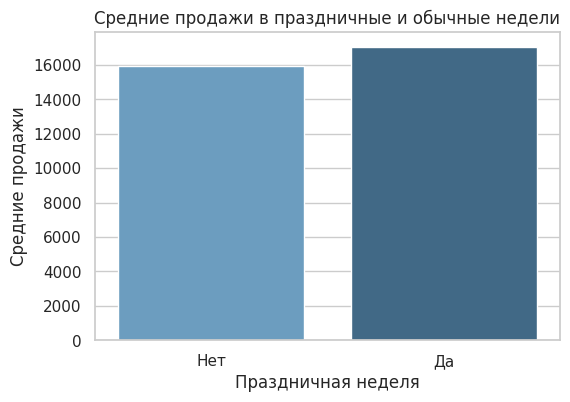

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=sales_by_holiday, palette='Blues_d')
plt.title('Средние продажи в праздничные и обычные недели')
plt.xlabel('Праздничная неделя')
plt.ylabel('Средние продажи')
plt.xticks([0,1], ['Нет', 'Да'])
plt.show()

Наблюдения:

- В праздничные недели средние продажи выше.
- Праздники стимулируют спрос.

## Анализ влияния признаков на продажи

### Продажи по температурным категориям

In [35]:
temp_order = ['Very cold', 'Cold', 'Warm', 'Hot']

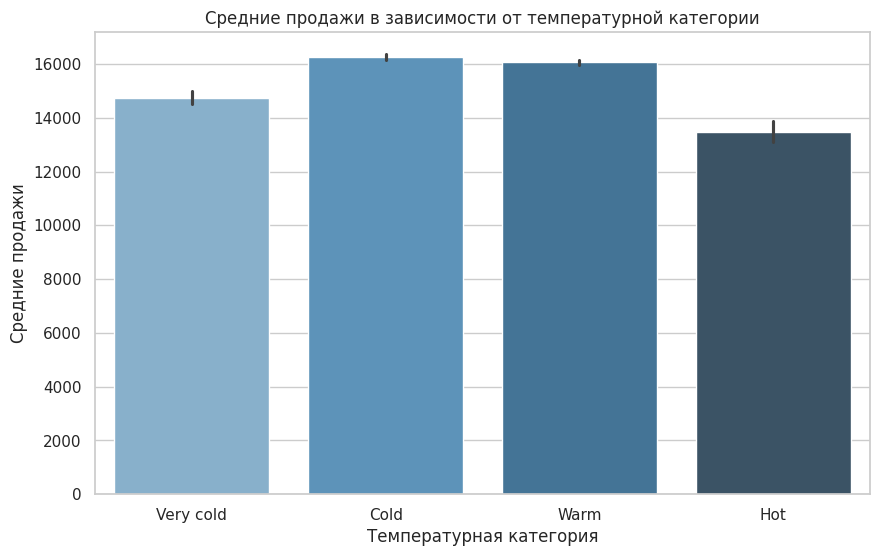

In [36]:
# Построение графика средних продаж по температурным категориям
plt.figure(figsize=(10,6))
sns.barplot(x='Temp_Category', y='Weekly_Sales', data=data,
      estimator=np.mean, palette='Blues_d', order=temp_order)
plt.title('Средние продажи в зависимости от температурной категории')
plt.xlabel('Температурная категория')
plt.ylabel('Средние продажи')
plt.show()

Анализ показывает, что средние еженедельные продажи максимальны при умеренной погоде (холодной и теплой) и снижаются при экстремальных температурах (очень холодной и жаркой).

### Влияние цен на топливо на продажи

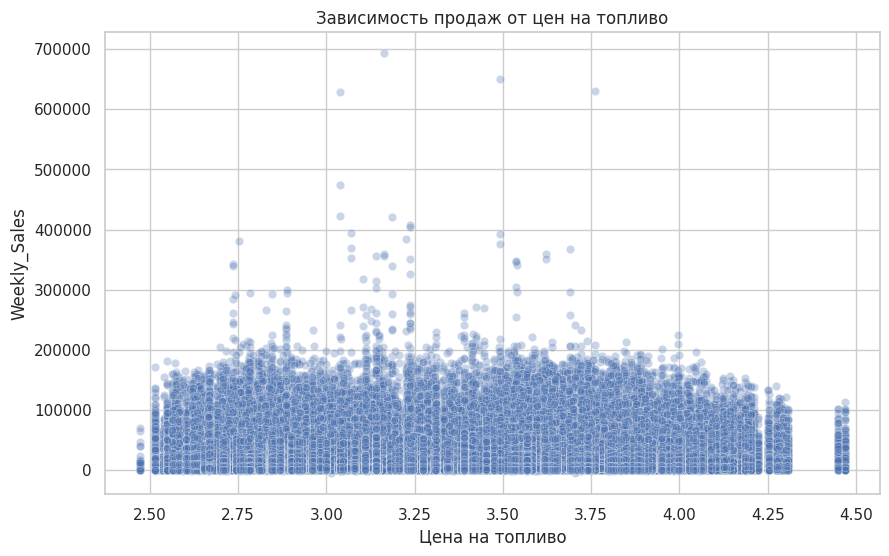

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data, alpha=0.3)
plt.title('Зависимость продаж от цен на топливо')
plt.xlabel('Цена на топливо')
plt.ylabel('Weekly_Sales')
plt.show()

Диаграмма рассеяния демонстрирует слабую, но заметную отрицательную корреляцию между ценой на топливо и еженедельными продажами. При росте цен на топливо продажи, как правило, немного снижаются. Наблюдается значительный разброс данных, что указывает на влияние других факторов.

### Влияние CPI на продажи

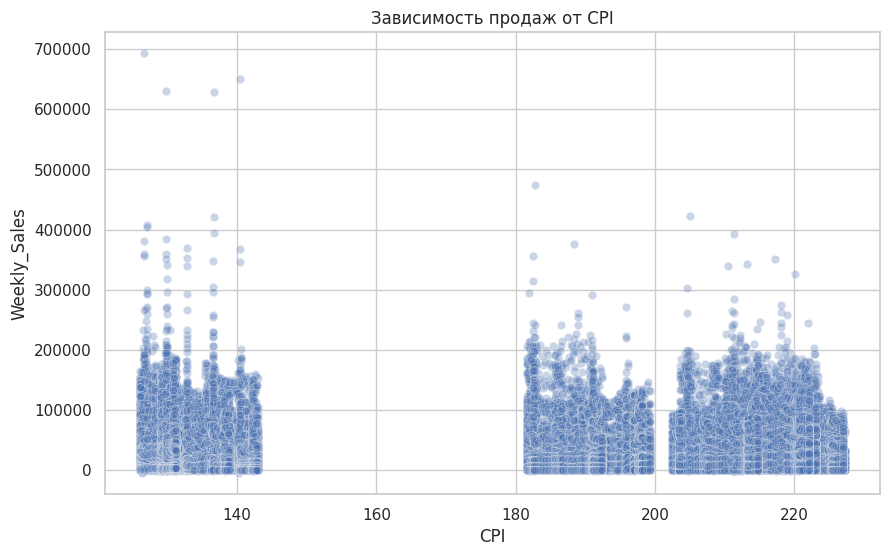

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data, alpha=0.3)
plt.title('Зависимость продаж от CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')
plt.show()

Диаграмма рассеяния показывает слабую связь между показателем CPI и еженедельными продажами. Наблюдается несколько кластеров данных, что указывает на возможное влияние других факторов. Нет четкой линейной зависимости.

### Влияние уровня безработицы на продажи

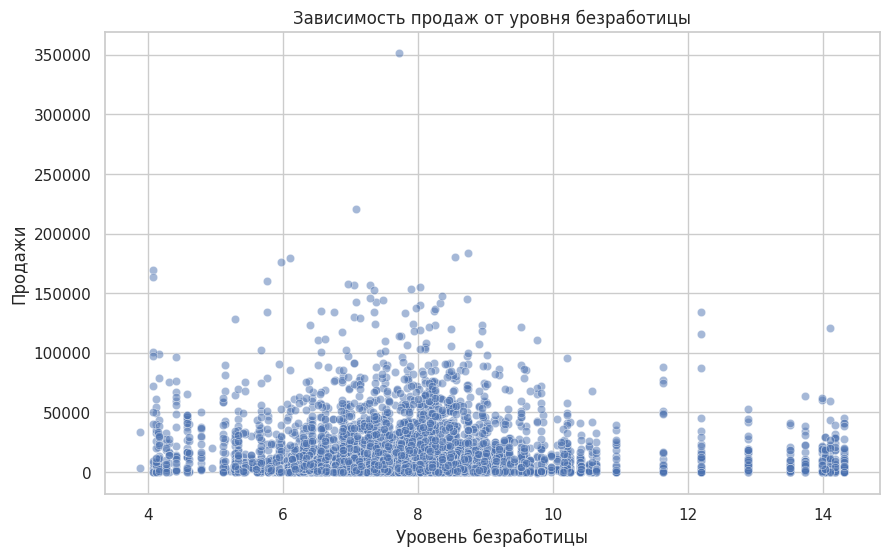

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data.sample(5000), alpha=0.5)
plt.title('Зависимость продаж от уровня безработицы')
plt.xlabel('Уровень безработицы')
plt.ylabel('Продажи')
plt.show()

Наблюдения:

Наблюдается слабая отрицательная корреляция между уровнем безработицы и продажами.
При росте безработицы продажи несколько снижаются.

## Анализ продаж по магазинам

### Топ 10 магазинов по продажам

In [40]:
# Сумма продаж по магазинам
sales_by_store = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [41]:
# Топ-10 магазинов
top_10_stores = sales_by_store.sort_values('Weekly_Sales', ascending=False).head(10)

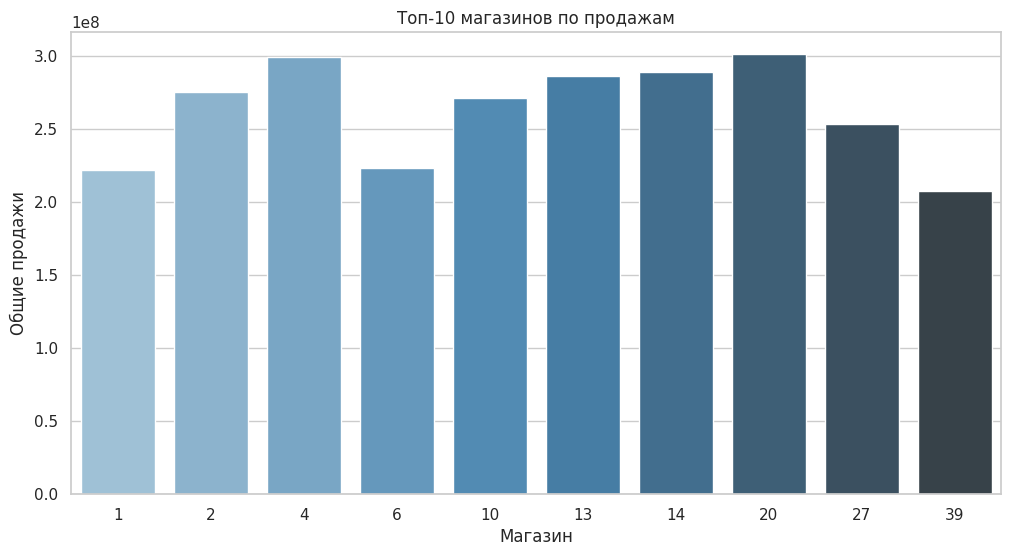

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x='Store', y='Weekly_Sales', data=top_10_stores, palette='Blues_d')
plt.title('Топ-10 магазинов по продажам')
plt.xlabel('Магазин')
plt.ylabel('Общие продажи')
plt.show()

Наблюдения:

- Топ-10 магазинов значительно опережают остальные по продажам.
- Возможные причины: расположение, размер, ассортимент.

### Анализ продаж по типу магазина

In [43]:
# Сумма продаж по типу магазина
sales_by_type = data.groupby('Type')['Weekly_Sales'].sum().reset_index()

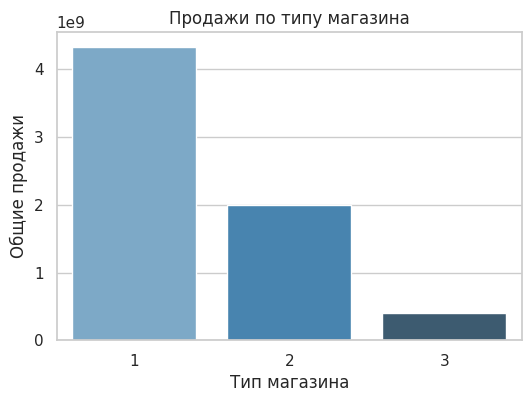

In [44]:
plt.figure(figsize=(6,4))
sns.barplot(x='Type', y='Weekly_Sales', data=sales_by_type, palette='Blues_d')
plt.title('Продажи по типу магазина')
plt.xlabel('Тип магазина')
plt.ylabel('Общие продажи')
plt.show()

Наблюдения:

- Магазины типа 1 имеют наибольшие продажи.
- Магазины типа 2 на втором месте.

### Плотность продаж по типам магазинов

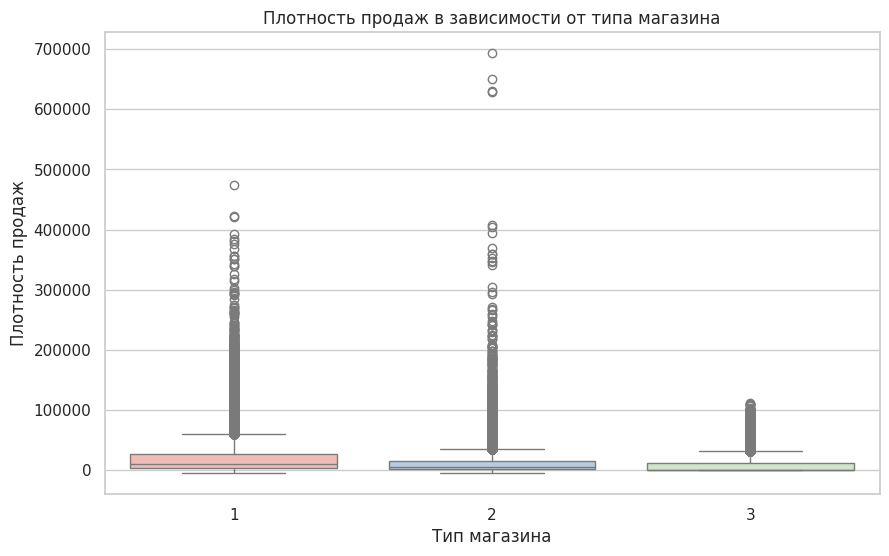

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Type', y='Weekly_Sales', data=data, palette='Pastel1')
plt.title('Плотность продаж в зависимости от типа магазина')
plt.xlabel('Тип магазина')
plt.ylabel('Плотность продаж')
plt.show()

Наблюдения:

Магазины типа 1 показывают наибольшую плотность продаж.

Магазины типа 3 имеют наименьшую плотность продаж.

### Влияние размера магазина на продажи

In [46]:
# Корреляция между продажами и размером магазина
corr_size_sales = data['Weekly_Sales'].corr(data['Size'])
corr_size_sales

0.2438279922630428

Наблюдения:
- Коэффициент корреляции 0.24 указывает на умеренную положительную связь между размером магазина и объёмом еженедельных продаж.
- Это означает, что с увеличением размера магазина продажи, как правило, возрастают, но эта связь не является сильной.
- Размер магазина влияет на продажи, но существуют и другие факторы, оказывающие существенное влияние на объём продаж.

Диаграмма рассеяния

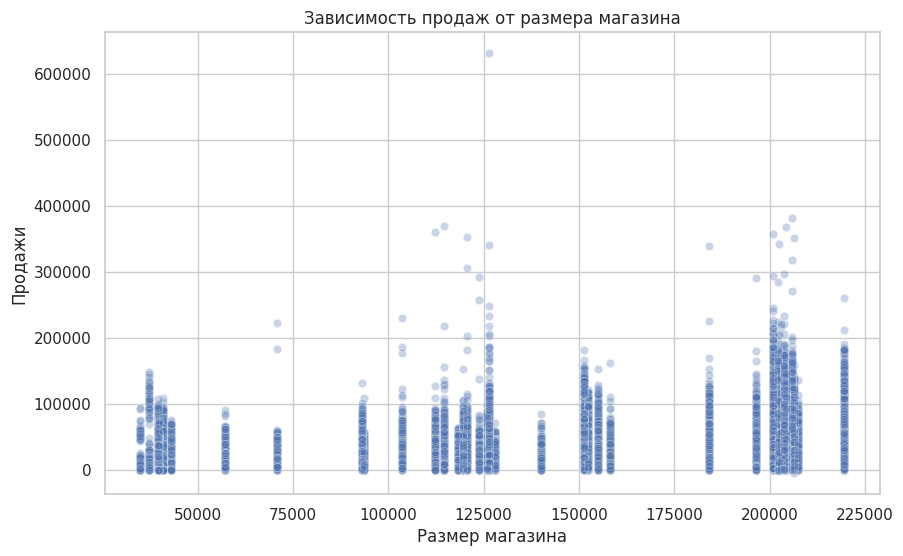

In [47]:
# Диаграмма рассеяния продаж от размера магазина
plt.figure(figsize=(10,6))
sns.scatterplot(x='Size', y='Weekly_Sales', data=data.sample(100000), alpha=0.3)
plt.title('Зависимость продаж от размера магазина')
plt.xlabel('Размер магазина')
plt.ylabel('Продажи')
plt.show()

Наблюдения:

- Тенденция к росту продаж с увеличением размера магазина видна, но разброс данных значительный.

## Анализ влияния скидок

Text(0.5, 0, 'Дата')

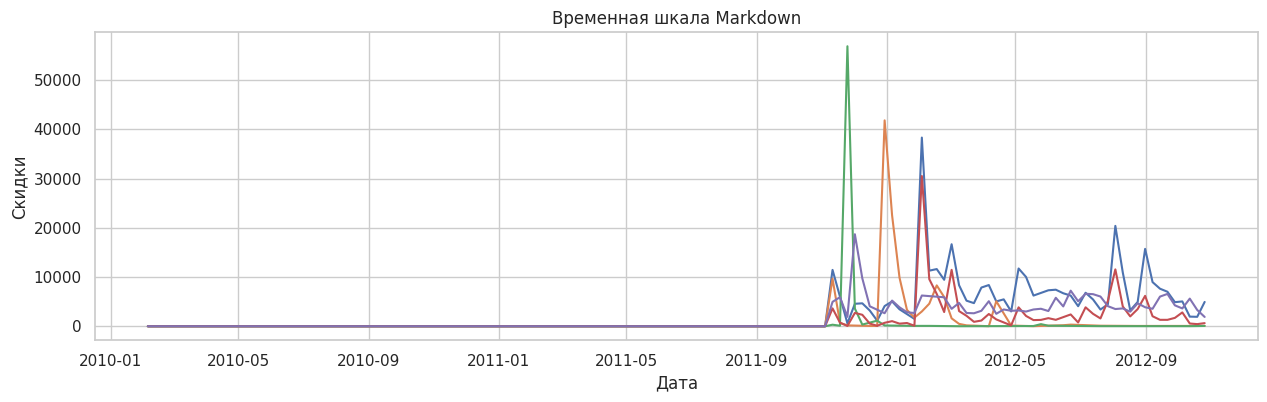

In [48]:
plt.figure(figsize=(15,4))
train_markdown = data[data.MarkDown2.notnull()]
train_markdown = train_markdown.groupby("Date").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})


plt.plot(train_markdown.index,train_markdown.MarkDown1)
plt.plot(train_markdown.index,train_markdown.MarkDown2)
plt.plot(train_markdown.index,train_markdown.MarkDown3)
plt.plot(train_markdown.index,train_markdown.MarkDown4)
plt.plot(train_markdown.index,train_markdown.MarkDown5)
plt.title("Временная шкала Markdown")
plt.ylabel("Скидки")
plt.xlabel("Дата")

График показывает временную динамику различных типов скидок (Markdown). Наблюдается нерегулярный характер скидок с несколькими пиками активности в течение периода, что указывает на проведение разовых промоакций. Большинство времени скидки минимальны или отсутствуют.

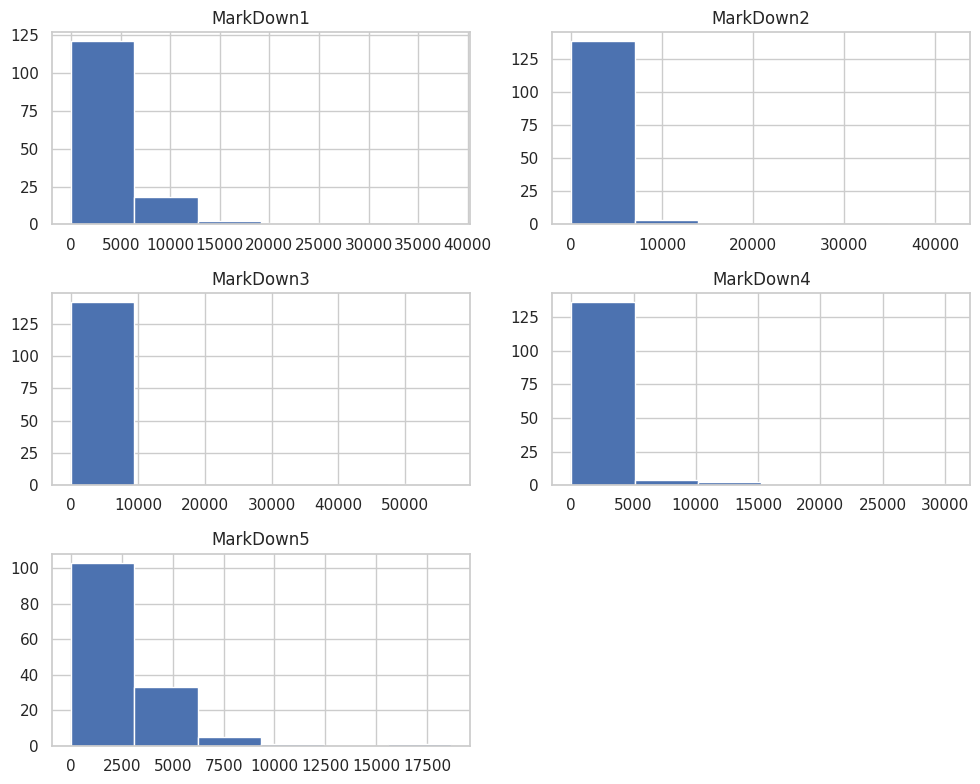

In [49]:
train_markdown.hist(figsize=(10,8),bins=6)
plt.tight_layout()
plt.show()

Наблюдения

- Гистограммы Markdown1, 2, 3 и 4 имеют очень похожую форму, что может указывать на сходный принцип их расчета.
- Гистограмма Markdown5 отличается от остальных, с более высокой концентрацией значений. Это может свидетельствовать о более детальном измерении Markdown в этом случае.

Text(0, 0.5, 'Скидки')

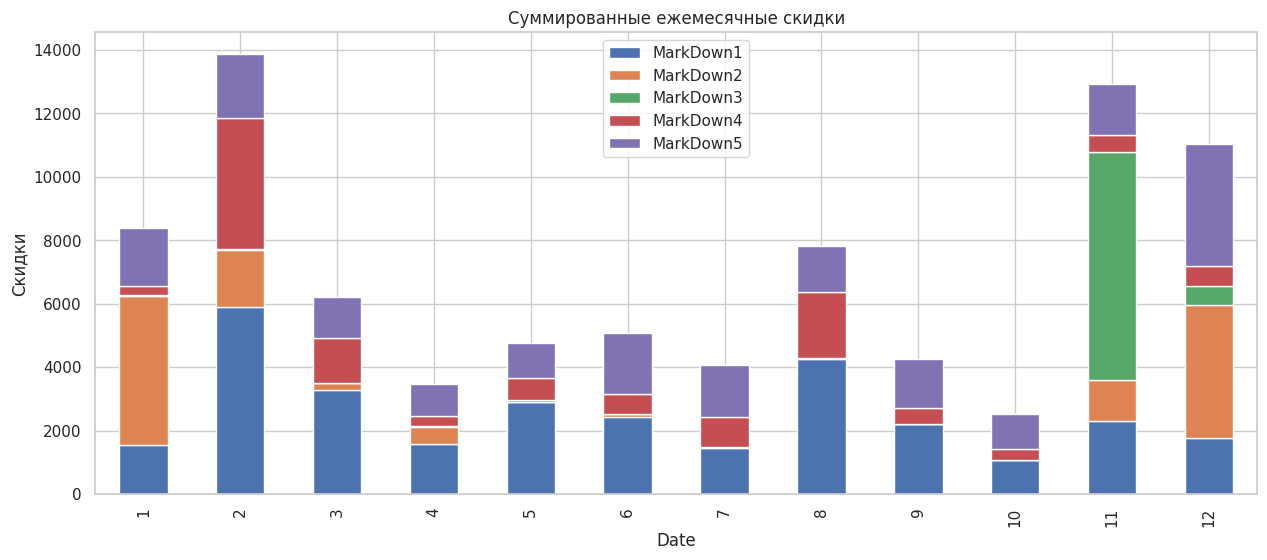

In [50]:
train_markdown_month = train_markdown.groupby(train_markdown.index.month).agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})
train_markdown_month.plot(kind='bar', stacked=True,figsize=(15,6))
plt.title("Суммированные ежемесячные скидки")
plt.ylabel("Скидки")

Text(0, 0.5, 'Скидки')

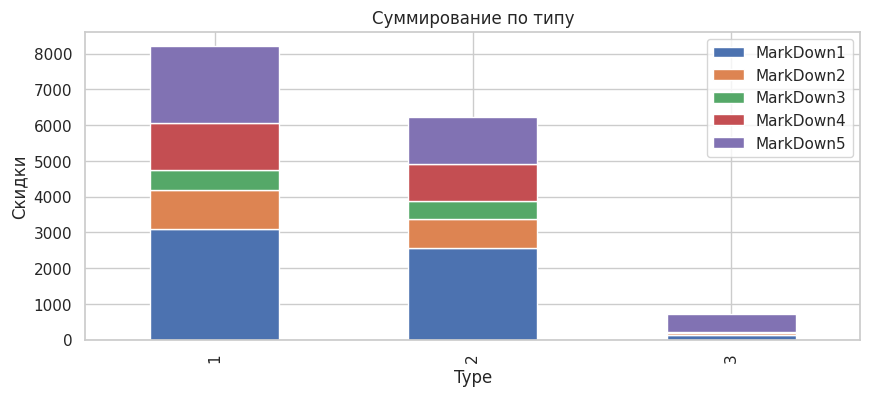

In [51]:
train_markdown_1 = data[data.MarkDown2.notnull()]
train_markdown_type = train_markdown_1.groupby("Type").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})
train_markdown_type.plot(kind='bar', stacked=True,figsize=(10,4))
plt.title("Суммирование по типу")
plt.ylabel("Скидки")

Наблюдения:
- Наибольшие суммарные скидки наблюдаются для типа 1.
- Тип 2 демонстрирует более равномерное распределение разных типов скидок.
- В типе 3 преобладает только Markdown5.


In [52]:
# Создание признака Total_MarkDown
data['Total_MarkDown'] = data[markdown_cols].sum(axis=1)

In [53]:
# Создание булевого признака Has_MarkDown
data['Has_MarkDown'] = data['Total_MarkDown'] > 0

In [54]:
# Средние продажи по наличию скидок
sales_by_markdown = data.groupby('Has_MarkDown')['Weekly_Sales'].mean().reset_index()

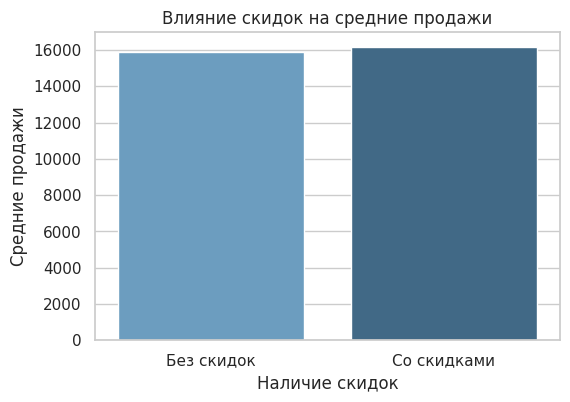

In [55]:
plt.figure(figsize=(6,4))
sns.barplot(x='Has_MarkDown', y='Weekly_Sales', data=sales_by_markdown, palette='Blues_d')
plt.title('Влияние скидок на средние продажи')
plt.xlabel('Наличие скидок')
plt.ylabel('Средние продажи')
plt.xticks([0,1], ['Без скидок', 'Со скидками'])
plt.show()

Наблюдения:

- Средние продажи выше при наличии скидок.
- Скидки эффективны для увеличения продаж.

## Анализ продаж по отделам

In [56]:
len(data["Dept"].unique())

81

In [57]:
data_Dept = data.groupby("Dept").agg({"Weekly_Sales":"sum"})
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales/10000
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales.apply(int)
data_Dept.sort_values(by="Weekly_Sales")

,Weekly_Sales
Dept,
39,0
78,0
43,0
47,0
51,3
...,...
90,29106
72,30572
38,39311


Text(0.5, 0, 'Отдел')

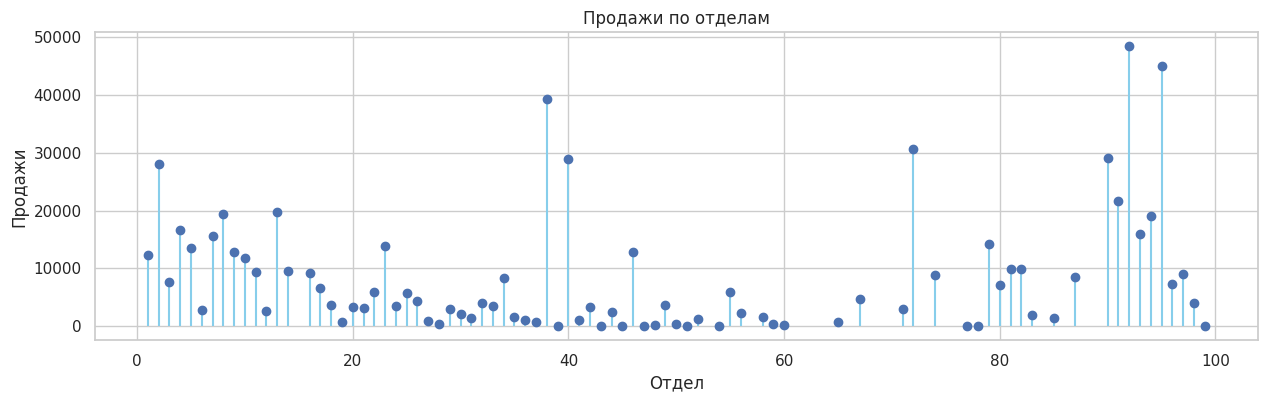

In [58]:
fig1, ax1 = plt.subplots(figsize=(15, 4))
plt.vlines(x=data_Dept.index, ymin=0, ymax=data_Dept['Weekly_Sales'], color='skyblue')
plt.plot(data_Dept.index,data_Dept['Weekly_Sales'], "o")
plt.title("Продажи по отделам")
plt.ylabel("Продажи")
plt.xlabel("Отдел")

Наблюдения:

Здесь мы видим, что отделы 1-15, а также 90-95 показали более высокие недельные продажи.
некоторые отделы, такие как 38,40,72 показали более высокие недельные продажи.

### Топ 10 отделов по продажам

In [59]:
# Сумма продаж по отделам
sales_by_dept = data.groupby('Dept')['Weekly_Sales'].sum().reset_index()

In [60]:
# Топ-10 отделов
top_10_depts = sales_by_dept.sort_values('Weekly_Sales', ascending=False).head(10)

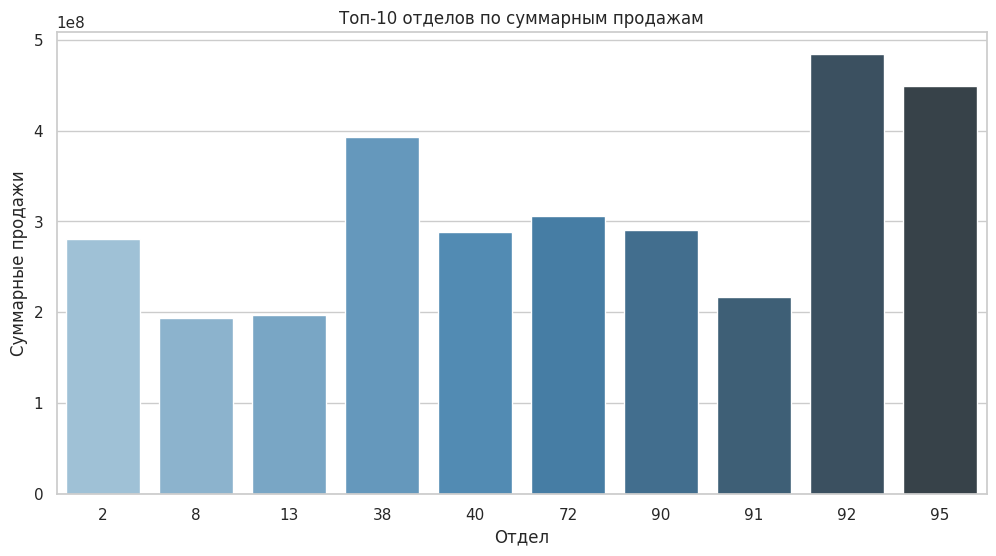

In [61]:
plt.figure(figsize=(12,6))
sns.barplot(x='Dept', y='Weekly_Sales', data=top_10_depts, palette='Blues_d')
plt.title('Топ-10 отделов по суммарным продажам')
plt.xlabel('Отдел')
plt.ylabel('Суммарные продажи')
plt.show()


Наблюдения:

- Отделы с наибольшими продажами являются ключевыми для компании.
- Фокус на этих отделах может повысить прибыльность.

### Анализ продаж по отделам во времени

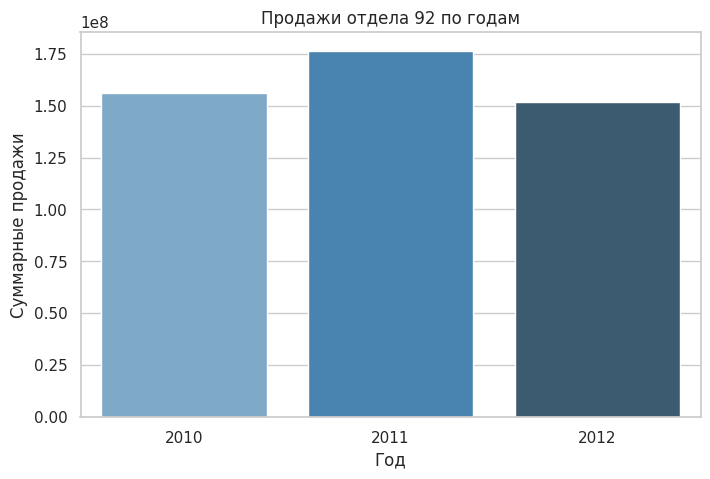

In [62]:
dept_time_sales = data.groupby(['Year', 'Dept'])['Weekly_Sales'].sum().reset_index()

# Департамент с наибольшими продажами
top_dept = top_10_depts['Dept'].iloc[0]
dept_sales_over_time = dept_time_sales[dept_time_sales['Dept'] == top_dept]

plt.figure(figsize=(8,5))
sns.barplot(x='Year', y='Weekly_Sales', data=dept_sales_over_time, palette='Blues_d')
plt.title(f'Продажи отдела {top_dept} по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.show()


## Корреляционный анализ

In [63]:
# Выбор столбцов для корреляционного анализа
corr_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Type']

In [64]:
# Расчет корреляции
corr_matrix = data[corr_columns].corr()

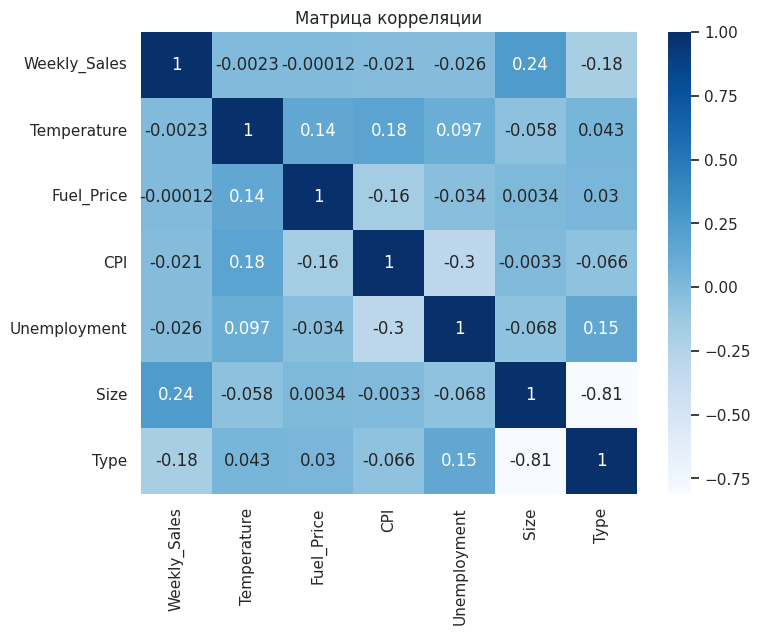

In [65]:
# Тепловая карта корреляции
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Матрица корреляции')
plt.show()

Наблюдения:

- Небольшая отрицательная корреляция между продажами и типом магазина.
- Небольшая положительная корреляция между продажами и размером магазина.

---------------------------------------------------------------
## Заключительные выводы:

Сезонность и праздники остаются ключевыми факторами, влияющими на продажи. Планирование запасов и маркетинговых кампаний должно учитывать пики в апреле, июле и в период основных праздников.

Тип и размер магазина существенно влияют на продажи. Магазины типа 1, особенно большие по размеру, демонстрируют лучшие показатели. Это может подсказать стратегии по развитию и инвестированию в определенные типы магазинов.

Скидки и промоакции доказали свою эффективность в увеличении объема продаж. Оптимизация стратегии скидок может привести к значительному росту доходов.

Экономические факторы, такие как уровень безработицы и CPI, оказывают влияние на покупательскую способность и поведение клиентов. Отслеживание этих показателей поможет лучше прогнозировать спрос.


# Обогащение данных и создание новых признаков

## ABC-XYZ Анализ

### Подготовка данных для анализа по отделам

In [66]:
# Расчет суммарных продаж, среднего и стандартного отклонения по отделам
dept_sales = data.groupby('Dept')['Weekly_Sales'].agg(['sum', 'mean', 'std']).reset_index()
dept_sales.columns = ['Dept', 'Total_Sales', 'Sales_Mean', 'Sales_Std']

In [67]:
# Расчет коэффициента вариации
dept_sales['CV'] = dept_sales['Sales_Std'] / dept_sales['Sales_Mean']

### Проведение ABC-анализа

In [68]:
# Сортировка отделов по суммарным продажам
dept_sales = dept_sales.sort_values(by='Total_Sales', ascending=False).reset_index(drop=True)

In [69]:
# Вычисление кумулятивной доли продаж
dept_sales['Cumulative_Sales'] = dept_sales['Total_Sales'].cumsum()
dept_sales['Cumulative_Percentage'] = 100 * dept_sales['Cumulative_Sales'] / dept_sales['Total_Sales'].sum()

In [70]:
# Присвоение категорий A, B, C
def assign_abc(percentage):
    if percentage <= 80:
        return 'A'
    elif percentage <= 95:
        return 'B'
    else:
        return 'C'

dept_sales['ABC_Category'] = dept_sales['Cumulative_Percentage'].apply(assign_abc)

### Проведение XYZ-анализа

In [71]:
# Присвоение категорий X, Y, Z на основе коэффициента вариации
def assign_xyz(cv):
    if cv <= 0.1:
        return 'X'
    elif cv <= 0.25:
        return 'Y'
    else:
        return 'Z'
dept_sales['XYZ_Category'] = dept_sales['CV'].apply(assign_xyz)

In [72]:
# Объединение категорий ABC и XYZ
dept_sales['ABC_XYZ_Category'] = dept_sales['ABC_Category'] + dept_sales['XYZ_Category']

In [73]:
dept_sales

,Dept,Total_Sales,Sales_Mean,Sales_Std,CV,Cumulative_Sales,Cumulative_Percentage,ABC_Category,XYZ_Category,ABC_XYZ_Category
0,92,4.839433e+08,75204.870531,49413.732570,0.657055,4.839433e+08,7.183132,A,Z,AZ
1,95,4.493202e+08,69824.423080,38200.536452,0.547094,9.332635e+08,13.852355,A,Z,AZ
2,38,3.931181e+08,61090.619568,23966.913901,0.392317,1.326382e+09,19.687376,A,Z,AZ
3,72,3.057252e+08,50566.515417,44710.982652,0.884201,1.632107e+09,24.225230,A,Z,AZ
4,90,2.910685e+08,45232.084488,32462.020077,0.717677,1.923175e+09,28.545536,A,Z,AZ
...,...,...,...,...,...,...,...,...,...,...
76,51,3.057283e+04,21.931729,29.146545,1.328967,6.737222e+09,100.000045,C,Z,CZ
77,78,1.714710e+03,7.296638,10.400545,1.425389,6.737224e+09,100.000071,C,Z,CZ
78,39,1.779800e+02,11.123750,9.511561,0.855068,6.737224e+09,100.000073,C,Z,CZ
79,43,1.432000e+01,1.193333,1.027745,0.861239,6.737224e+09,100.000074,C,Z,CZ


### Визуализация результатов ABC-XYZ анализа

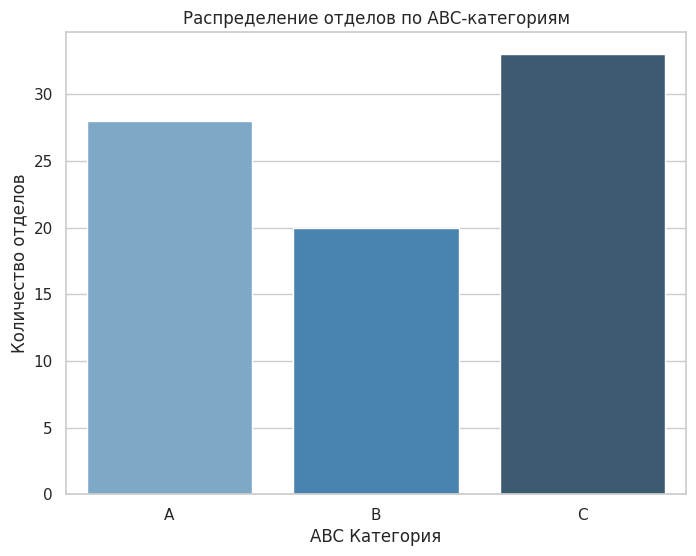

In [74]:
# Распределение отделов по категориям ABC
plt.figure(figsize=(8,6))
sns.countplot(x='ABC_Category', data=dept_sales, order=['A', 'B', 'C'], palette='Blues_d')
plt.title('Распределение отделов по ABC-категориям')
plt.xlabel('ABC Категория')
plt.ylabel('Количество отделов')
plt.show()

Большинство отделов относятся к категории C (низкая доля в общих продажах), затем следует категория A (высокая доля), а наименьшее количество отделов в категории B (средняя доля). Это указывает на неравномерное распределение продаж между отделами.

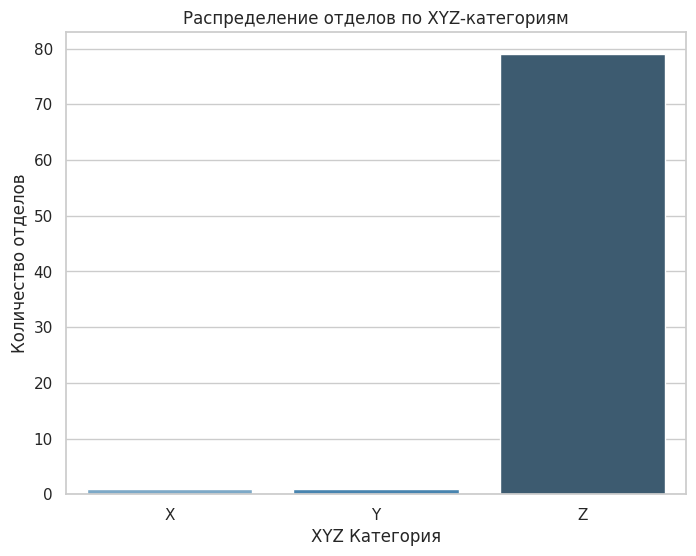

In [75]:
# Распределение отделов по категориям XYZ
plt.figure(figsize=(8,6))
sns.countplot(x='XYZ_Category', data=dept_sales, order=['X', 'Y', 'Z'], palette='Blues_d')
plt.title('Распределение отделов по XYZ-категориям')
plt.xlabel('XYZ Категория')
plt.ylabel('Количество отделов')
plt.show()

Подавляющее большинство отделов (категория Z) характеризуется высокой нестабильностью продаж (высокий коэффициент вариации). Отделы с низкой (X) и средней (Y) вариабельностью продаж составляют очень малую долю.

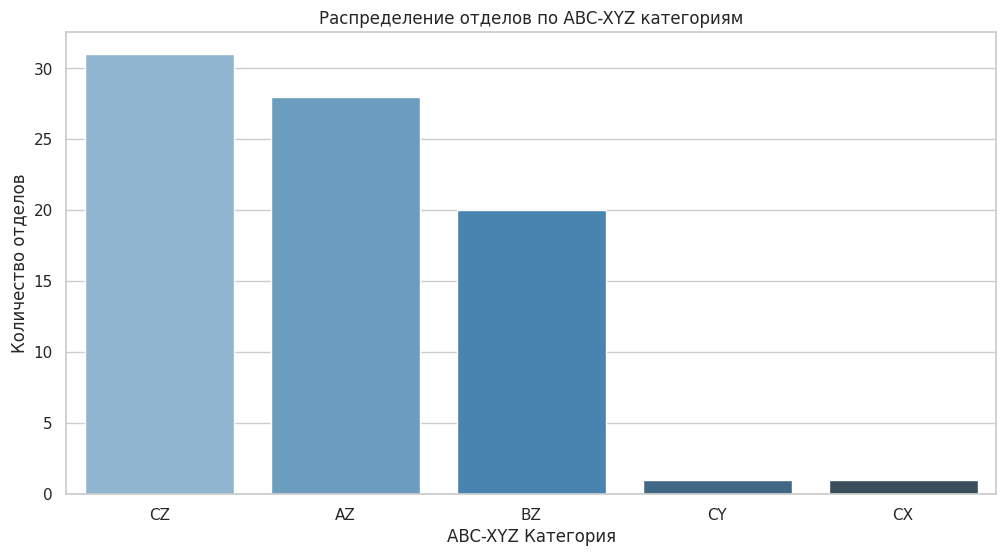

In [76]:
# Распределение отделов по комбинированным категориям ABC-XYZ
plt.figure(figsize=(12,6))
sns.countplot(x='ABC_XYZ_Category', data=dept_sales, order=dept_sales['ABC_XYZ_Category'].value_counts().index, palette='Blues_d')
plt.title('Распределение отделов по ABC-XYZ категориям')
plt.xlabel('ABC-XYZ Категория')
plt.ylabel('Количество отделов')
plt.show()

Большинство отделов попали в категории CZ и AZ, указывая на их низкую долю продаж с нестабильным спросом и высокую долю продаж с также нестабильным спросом соответственно. Меньше всего отделов в категориях CY и CX, что свидетельствует о малом числе отделов со стабильным спросом.

In [77]:
# Добавление результатов ABC-XYZ анализа в основной датасет
data = data.merge(dept_sales[['Dept', 'ABC_Category', 'XYZ_Category', 'ABC_XYZ_Category']], on='Dept', how='left')

Выводы

- Категория A включает отделы, генерирующие 80% продаж. Эти отделы являются наиболее важными для бизнеса и требуют повышенного внимания в управлении запасами и маркетинге.
- Категория B представляет отделы со средним вкладом в продажи (15%). Их следует контролировать и искать возможности для увеличения продаж.
- Категория C состоит из отделов с наименьшим вкладом (5%). Возможно, стоит рассмотреть оптимизацию ассортимента этих отделов.
- Категория X (низкая вариабельность) включает отделы с устойчивым спросом. Это облегчает прогнозирование и управление запасами.
- Категория Z (высокая вариабельность) включает отделы с непредсказуемым спросом, что требует более гибкого подхода в управлении запасами.

## RFM анализ для магазинов

### Расчет RFM метрик

In [78]:
# Последняя дата в данных
latest_date = data['Date'].max()

In [79]:
# Проводим RFM-анализ
latest_date = data['Date'].max()
rfm = data.groupby('Store').agg({
  'Date': lambda x: (latest_date - x.max()).days,
  'Weekly_Sales': ['count', 'sum']
}).reset_index()
rfm.columns = ['Store', 'Recency', 'Frequency', 'Monetary']

In [80]:
# Объединение данных RFM с основными данными
data = data.merge(rfm[['Store', 'Recency', 'Frequency', 'Monetary']], on='Store', how='left')

### Присвоение RFM баллов

In [81]:
# Обработка метрики Recency
if rfm['Recency'].nunique() > 1:
  rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1]).astype(int)
else:
  rfm['R_Score'] = 4

In [82]:
# Обработка метрики Frequency
if rfm['Frequency'].nunique() >= 4:
  rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4]).astype(int)
else:
  rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=rfm['Frequency'].nunique(), labels=False) + 1

In [83]:
# Обработка метрики Monetary
if rfm['Monetary'].nunique() >= 4:
  rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4]).astype(int)
else:
  rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=rfm['Monetary'].nunique(), labels=False) + 1

### Расчет суммарного RFM балла и сегментация

In [84]:
# Суммарный RFM балл
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

In [85]:
# Сегментация магазинов на основе RFM анализа
def rfm_segment(score):
  if score >= 10:
    return 'The best'
  elif score >= 6:
    return 'Reliable'
  else:
    return 'Risky'
rfm['Segment'] = rfm['RFM_Score'].apply(rfm_segment)

In [86]:
# Объединение данных RFM с основными данными
data = data.merge(rfm[['Store', 'R_Score', 'F_Score', 'M_Score', 'Segment']], on='Store', how='left')

### Визуализация результатов RFM анализа

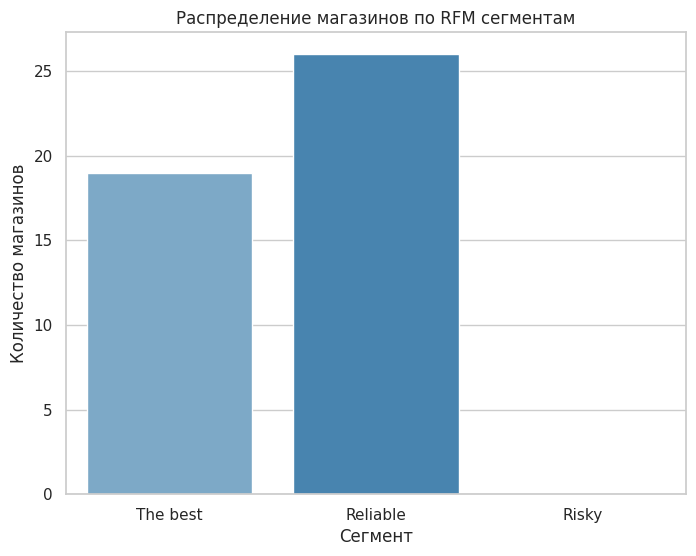

In [87]:
# Распределение магазинов по сегментам
plt.figure(figsize=(8,6))
sns.countplot(x='Segment', data=rfm, order=['The best', 'Reliable', 'Risky'], palette='Blues_d')
plt.title('Распределение магазинов по RFM сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Количество магазинов')
plt.show()

- Лучшие магазины: Имеют высокий суммарный RFM балл. Это ключевые точки продаж с высокой активностью и оборотом.
- Надежные магазины: Средние показатели, стабильные магазины. Стоит работать над повышением их показателей.
- Рискованные магазины: Низкие показатели по метрикам RFM. Требуют особого внимания и разработки стратегий для улучшения.

### Влияние скидок на продажи в разных RFM сегментах

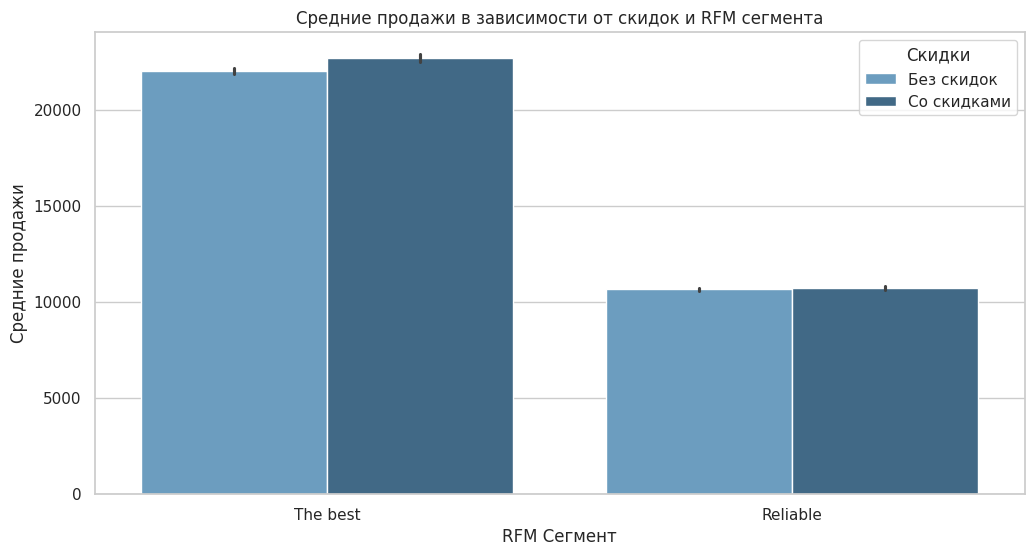

In [88]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='Weekly_Sales', hue='Has_MarkDown', data=data, estimator=np.mean, palette='Blues_d')
plt.title('Средние продажи в зависимости от скидок и RFM сегмента')
plt.xlabel('RFM Сегмент')
plt.ylabel('Средние продажи')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, title='Скидки', labels=['Без скидок', 'Со скидками'])
plt.show()

Наблюдения:

- Во всех сегментах наличие скидок повышает средние продажи.
- В сегменте "Лучшие" магазины показывают наибольший рост при применении скидок.

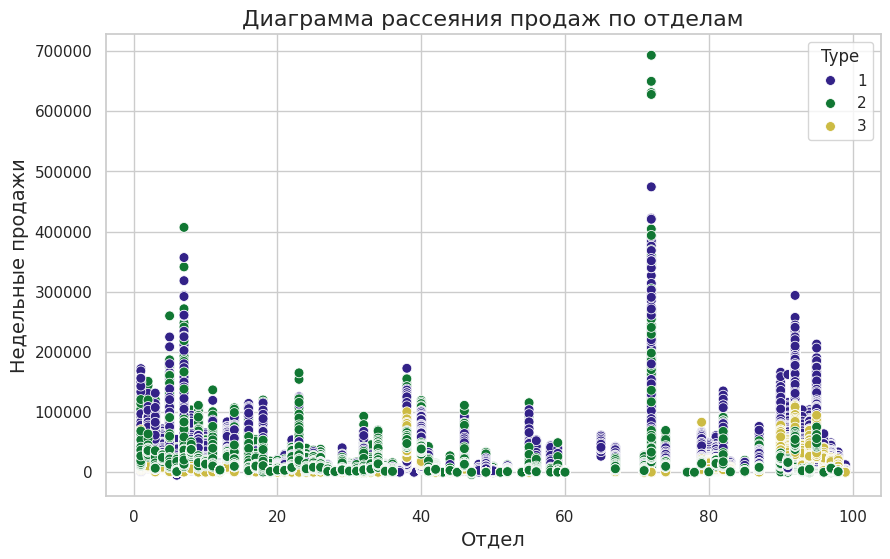

In [89]:
# Диаграмма рассеяния для продаж по отделам
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dept', y='Weekly_Sales', hue='Type', data=data,
        palette=['#332288', '#117733', '#ccbb44'], # Синие оттенки
        s=50) # Размер точек
plt.title('Диаграмма рассеяния продаж по отделам', fontsize=16)
plt.xlabel('Отдел', fontsize=14)
plt.ylabel('Недельные продажи', fontsize=14)
plt.grid(True) # Добавляем сетку
plt.show()


Наблюдения:

• Тип магазина и продажи: На диаграмме видно, что магазины типа 1 (темно-синий) имеют более широкий разброс продаж по отделам, чем магазины типа 2 (зеленый) и 3 (желтый). Это может указывать на то, что магазины типа 1 более разнообразны по ассортименту или имеют более высокую покупательскую активность.

• Отдельные пики продаж: Некоторые отделы демонстрируют значительно более высокие продажи, чем другие. Это может указывать на то, что эти отделы предлагают особенно популярные товары или услуги.

• Отсутствие явной зависимости: На диаграмме не наблюдается четкой зависимости между типом магазина и уровнем продаж. Это может указывать на то, что тип магазина не является единственным фактором, определяющим уровень продаж.

Сохранение копии обработанных данных в csv на гугл диск:

In [90]:
# from google.colab import drive
# drive.mount('/content/drive')

In [91]:
# data.to_csv('/content/drive/My Drive/data.csv', index=False)

---------------------------------------------------------------
## Заключительные выводы:

- ABC-XYZ анализ помог выделить ключевые отделы, обеспечивающие основную часть продаж, и оценить стабильность их спроса.
- RFM анализ позволил сегментировать магазины по активности и объему продаж, что поможет в разработке индивидуальных стратегий для каждого сегмента.
- Влияние скидок: Скидки положительно влияют на продажи во всех сегментах и категориях.